### Import modules 

In [1]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
plt.rcParams['figure.figsize'] = (11, 7)
import pandas as pd
import numpy as np

### Import the labelled dataset and plot it 

In [2]:
df = pd.read_csv('labelled_data_sample.csv')
df[['time']] = df[['time']].apply(pd.to_datetime)
df.rename(columns = {'Unnamed: 0':'x_column' }, inplace = True)

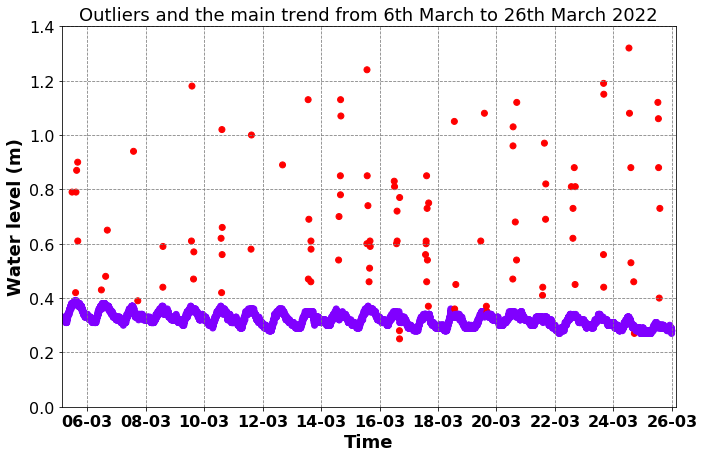

In [4]:
plt.rcParams['figure.figsize'] = (11, 7)
fig, ax = plt.subplots(1,1)
fig.patch.set_facecolor('white')
ax.scatter(df['time'],df['height'], c = df['datapoint_label'] , cmap='rainbow')
ax.grid(color = 'gray', linestyle = '--', linewidth = 0.8)
ax.set_title('Outliers and the main trend from 6th March to 26th March 2022', fontsize=18)
ax.set_xlabel('Time', fontsize=18, weight = 'bold')
ax.set_ylabel('Water level (m)', fontsize=18, weight = 'bold')
ax.set_xlim(['2022-03-06 00:00:00'],['2022-03-26 23:59:59'])
ax.set_ylim(0, 1.4)
ax.set_xticklabels(df['time'], fontsize=16, weight='bold')
ax.tick_params(axis='y', labelsize=16)
ax.tick_params(axis='x',which='major', labelsize=16)

## Define the date format
date_form = DateFormatter("%d-%m")
ax.xaxis.set_major_formatter(date_form)
ax.set(facecolor = "white")
#plt.savefig('sample_black.png', dpi=450, orientation='portrait', bbox_inches='tight', facecolor='w',edgecolor='b',)
plt.show()

### DBSCAN (1D)
- Density-based technique of anomaly detection
- Good for data with clusters
- From sklearn.cluster import DBSCAN (import the algorithm from scikit-learn)

In [5]:
from dbscan1d.core import DBSCAN1D
import datetime as datetime
water_level = np.array(df['height'])

###  DBSCAN water level data fitting

In [6]:
DBSCAN_labels = DBSCAN1D(eps = .015, min_samples= 60).fit_predict(water_level.reshape(-1, 1))
print(DBSCAN_labels)

[0 0 0 ... 0 0 0]


### DBSCAN labels on the dataframe 

In [7]:
DBSCAN_labels = list(DBSCAN_labels)
df['DBSCAN_labels'] = DBSCAN_labels
df.to_csv ('DBSCAN_output.csv', header=True,index = False)

### DBSCAN Output plot 

In [8]:
DBSCAN_list = list(df['DBSCAN_labels'])
clusters =[]
for i in DBSCAN_list:
    if i == 0:
        cluster = 0
    else:
        cluster = 1
    clusters.append(cluster) 
    p = clusters

In [9]:
df['DBSCAN_index'] = p
df2 = df.drop( ['DBSCAN_labels','x_column' ], axis=1)

In [10]:
df2.to_csv ('DBSCAN_output_metric.csv', header=True,index = False)

In [11]:
temp_df = df2.loc[(df2['DBSCAN_index'] == 0)]
df3 = temp_df.set_index('time')
df4 = df3.reset_index()

In [12]:
temp_df1 = df2.loc[(df2['DBSCAN_index'] == 1)]
df5 = temp_df1.set_index('time')
df6 = df5.reset_index()

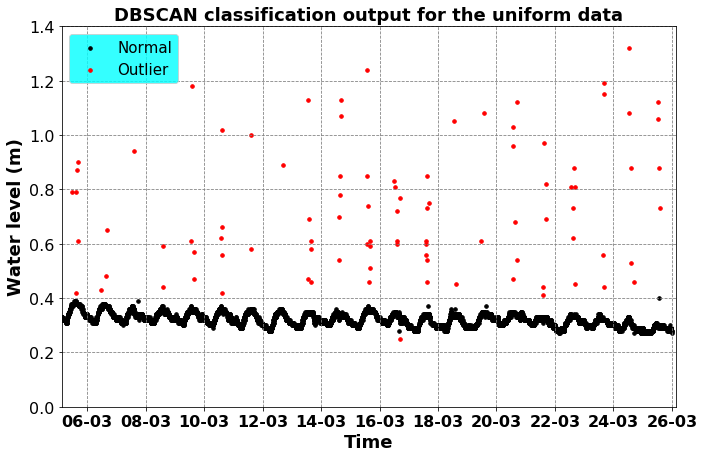

In [26]:
plt.rcParams['figure.figsize'] = (11, 7)
fig, ax = plt.subplots(1,1)
fig.patch.set_facecolor('white')
Normal = ax.scatter(df4['time'],df4['height'], c ="black", marker="o", s = 10**1.1)
Outlier = ax.scatter(df6['time'],df6['height'], c ="red",marker ="o", s = 10**1.1)
ax.grid(color = 'gray', linestyle = '--', linewidth = 0.8)
ax.set_title('DBSCAN classification output for the uniform data', fontsize=18,weight='bold')
ax.set_xlabel('Time', fontsize=18, weight = 'bold')
ax.set_ylabel('Water level (m)', fontsize=18, weight = 'bold')
ax.set_xlim(['2022-03-06 00:00:00'],['2022-03-26 23:59:59'])
ax.set_ylim(0, 1.4)
ax.set_xticklabels(df['time'], fontsize=16, weight='bold')
ax.tick_params(axis='y', labelsize=16)
ax.tick_params(axis='x',which='major', labelsize=16)

## Define the date format
date_form = DateFormatter("%d-%m")
ax.xaxis.set_major_formatter(date_form)
ax.legend(["Normal", "Outlier"], loc ="upper left", fancybox=True,facecolor='#01FFFF',prop={'size': 15,  'style': 'normal'})
ax.set(facecolor = "white")

plt.savefig('dbscan_normal.png', dpi=450, orientation='portrait', bbox_inches='tight', facecolor='w',edgecolor='b',)
plt.show()

### Model metrics 

In [15]:
from sklearn.metrics import accuracy_score, f1_score,precision_score, recall_score, confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay
data_labels = list(df2['datapoint_label'])
DBSCAN_labels = list(df2['DBSCAN_index'])

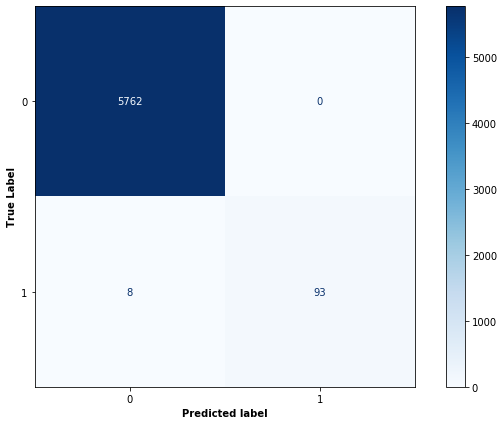

In [16]:
c_matrix = confusion_matrix (data_labels,DBSCAN_labels)
disp = ConfusionMatrixDisplay(c_matrix )
disp.plot(cmap=plt.cm.Blues,values_format='g',)
plt.xlabel('Predicted label', weight = 'bold')
plt.ylabel('True Label', weight = 'bold')


plt.savefig('con1.png', dpi=450, orientation='portrait', bbox_inches='tight', facecolor='w',edgecolor='b',)
plt.show()

In [17]:
data_accuracy = accuracy_score (data_labels,DBSCAN_labels)
data_accuracy

0.9986355108306327

In [18]:
data_precision = precision_score (data_labels,DBSCAN_labels)
data_precision

1.0

In [19]:
data_recall_score = recall_score (data_labels,DBSCAN_labels)
data_recall_score

0.9207920792079208

In [20]:
data_f1_score = f1_score (data_labels,DBSCAN_labels)
data_f1_score

0.9587628865979382

In [21]:
x = ['Accuracy', 'Precision', 'Recall', 'F1_score']
y = [data_accuracy, data_precision, data_recall_score,data_f1_score ]

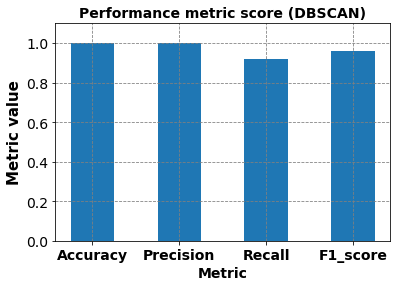

In [22]:
plt.rcParams['figure.figsize'] = (6, 4)
fig, ax = plt.subplots(1,1)
fig.patch.set_facecolor('white')
ax.bar(x, y, width=0.5)
ax.grid(color = 'gray', linestyle = '--', linewidth = 0.8)
ax.set_title('Performance metric score (DBSCAN)', fontsize=14, weight='bold')
ax.set_xlabel('Metric', fontsize=14, weight = 'bold')
ax.set_ylabel('Metric value', fontsize=15, weight = 'bold')
ax.set_ylim(0, 1.1)
ax.set_xticklabels(x, fontsize=12, weight='bold')
ax.tick_params(axis='y', labelsize=14)
ax.tick_params(axis='x',which='major', labelsize=14)

## Define the date format
ax.set(facecolor = "white")
plt.savefig('bar1.png', dpi=450, orientation='portrait', bbox_inches='tight', facecolor='w',edgecolor='b',)
plt.show()